In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Read Data & Basic Statistics

In [2]:
data = pd.read_csv("recommend_72h.csv")

In [5]:
from datetime import datetime
data["time"] = data["time"].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S"))

In [46]:
data

,time,userid,status
0,2023-04-23 18:04:37,68097,200
1,2023-04-23 18:04:37,645199,200
2,2023-04-23 18:04:37,792191,200
3,2023-04-23 18:04:37,243753,200
4,2023-04-23 18:04:38,667392,200
...,...,...,...
1119180,2023-04-26 18:04:36,88113,200
1119181,2023-04-26 18:04:37,90527,200
1119182,2023-04-26 18:04:37,857919,200
1119183,2023-04-26 18:04:37,111780,200


In [47]:
# status code statistics
data.status.value_counts()

200    1116140
0         3045
Name: status, dtype: int64

# 2. Basic Diagrams

<Axes: >

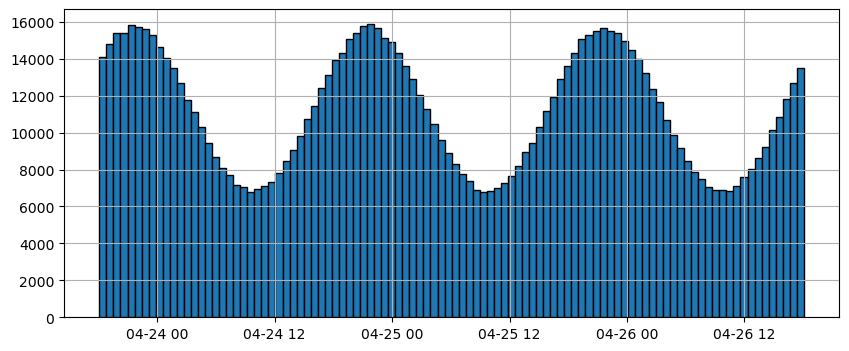

In [48]:
data.time.hist(bins=100, edgecolor='black', figsize=(10,4))

<Axes: >

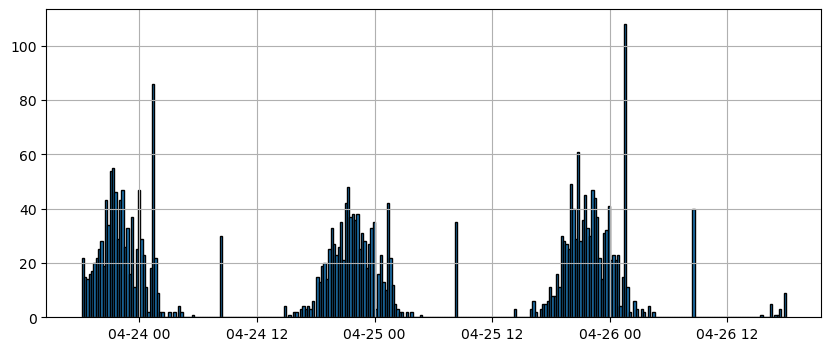

In [51]:
data[data.status==0].time.hist(bins=300, edgecolor='black', figsize=(10,4))

# 3. Further Exploration

<Axes: >

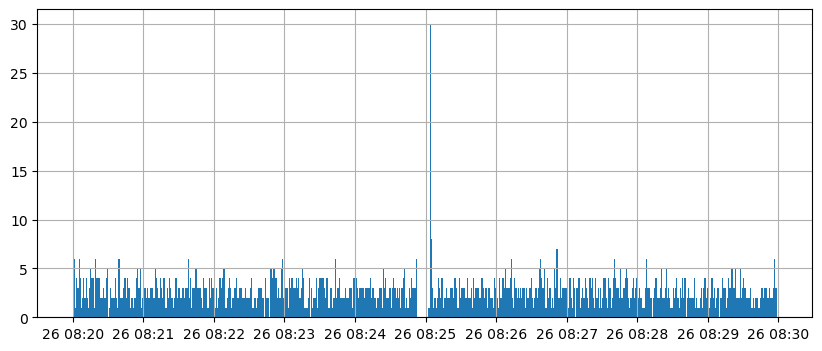

In [54]:
# request counts per second between 04-26 08:20 and 04-26 08:30
data[(data.time>=datetime(2023,4,26,8,20,0))&(data.time<datetime(2023,4,26,8,30,0))].time.hist(bins=600, figsize=(10,4))

In [57]:
sec_counts = data.groupby(["time"])[["status"]].count().reset_index()
sec_counts.describe()

,status
count,257964.000000
mean,4.338532
std,1.923821
min,1.000000
25%,3.000000
50%,4.000000
75%,6.000000
max,60.000000


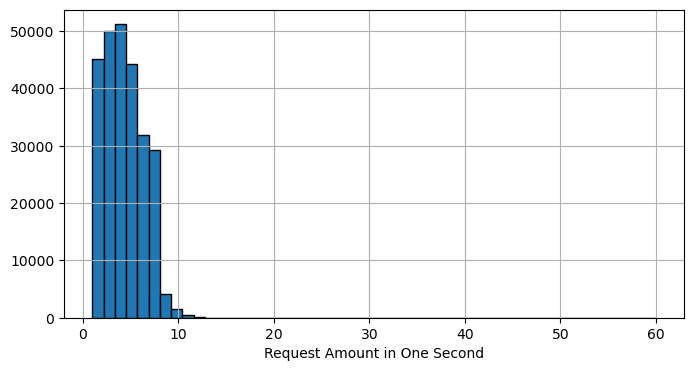

In [68]:
sec_counts.status.hist(bins=50, edgecolor='black', figsize=(8,4))
plt.xlabel("Request Amount in One Second")
plt.show()

In [65]:
sec_counts[sec_counts.status > 20] 

,time,status
25984,2023-04-24 01:17:49,24
51508,2023-04-24 08:25:05,25
112508,2023-04-25 01:26:01,23
137529,2023-04-25 08:25:05,25
198970,2023-04-26 01:34:14,60
223481,2023-04-26 08:25:04,30


In [69]:
sec_counts[sec_counts.status > 15] 

,time,status
21798,2023-04-24 00:07:56,17
25984,2023-04-24 01:17:49,24
25985,2023-04-24 01:17:50,17
51508,2023-04-24 08:25:05,25
112508,2023-04-25 01:26:01,23
112509,2023-04-25 01:26:02,16
137529,2023-04-25 08:25:05,25
198970,2023-04-26 01:34:14,60
223481,2023-04-26 08:25:04,30
